# Customer Churn Prediction Project

## Overview

The goal of this project is to build a classifier to predict potential churning customers and suggest recommendations to keep the customers.


## Business Problem

Syriatel telecommunication company hired a data scientist to build a classifier that can predict which customers will stop dealing with them for another provider, and identify how the company can avoid the loss of those customers.

## Data Understanding

The Syriatel dataset is from the Kaggle website. The dataset consists of 3333 customers, 21 columns with different features (continuous and categorical). These features will help to understand which factor affects the customer's decision to stay or leave.

* **churn** - churn is the prediction target
* Plans Like if the customer has some plans or not like international plan and voice mail.
* How long the customer was with the company
* How many calls the customer made day, evening, and nights, how many minutes were each call, and its charges
* How many times the customer calls customer service.


## Obtain the data

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
import category_encoders as ce
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import pipeline

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
# read in the data
df00 =pd.read_csv("/Users/hudakassoumeh/Documents/Flatiron/Projects/churn_prediction/Data/Syriatel.csv")
df00.head().T

,0,1,2,3,4
state,KS,OH,NJ,OH,OK
account length,128,107,137,84,75
area code,415,415,415,408,415
phone number,382-4657,371-7191,358-1921,375-9999,330-6626
international plan,no,no,no,yes,yes
voice mail plan,yes,yes,no,no,no
number vmail messages,25,26,0,0,0
total day minutes,265.1,161.6,243.4,299.4,166.7
total day calls,110,123,114,71,113
total day charge,45.07,27.47,41.38,50.9,28.34


In [4]:
df0 = df00.copy()

In [5]:
df0.describe().T # checking some stat info for numeric cols

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [6]:
# checking some stat for object type/ categorical cols
df0[[c for c in df0.columns if df0[c].dtype == object]].describe()

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,385-7688,no,no
freq,106,1,3010,2411


In [7]:
df0.info() #check type of data and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Scrub the data

In [8]:
df0.isna().sum() #check for any missing value

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
df0["phone number"].duplicated().any() 
# check for any duplicate phone number because the phone number like an ID

False

In [10]:
df0.duplicated().any() # check for any duplicate

False

In [11]:
df0.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [12]:
#check if the data type is correct or not
for col in df0.columns:
    print(df0[col].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5  

In [13]:
# drop the unwanted column, phone number is like an ID, with no valid information for the model
df0 = df0.drop(["phone number"],axis =1) 

In [14]:
df0.head().T

,0,1,2,3,4
state,KS,OH,NJ,OH,OK
account length,128,107,137,84,75
area code,415,415,415,408,415
international plan,no,no,no,yes,yes
voice mail plan,yes,yes,no,no,no
number vmail messages,25,26,0,0,0
total day minutes,265.1,161.6,243.4,299.4,166.7
total day calls,110,123,114,71,113
total day charge,45.07,27.47,41.38,50.9,28.34
total eve minutes,197.4,195.5,121.2,61.9,148.3


## Explore the data

In [15]:
df0["churn"].value_counts()[1]/len(df0)*100 #find the churn rate 

14.491449144914492

In [16]:
# # pie chart for readme
# fig = plt.gcf()
# fig.set_size_inches(7,7)
# colors = ["cyan", "yellow"]
# plt.pie(df0["churn"].value_counts(),labels=('Stay','Go'),explode = [0.1,0],autopct ='%1.1f%%' ,
#         shadow = True,startangle = 90,labeldistance = 1.1,colors=colors)
# plt.axis('equal')
# plt.title("Should I Stay or Should I Go ", fontsize=17)
# plt.savefig("images/Should I Stay or Should I Go.png")
# plt.show()

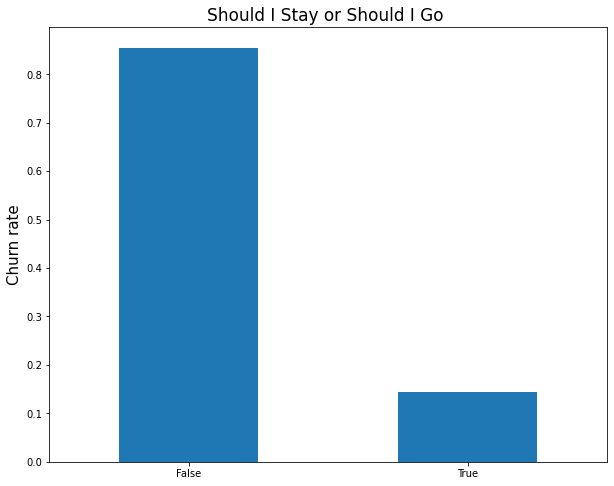

In [17]:
# the target is an imbalance, 86% False and 14% True, so there is an 86% chance that the model will predict False
df0["churn"].value_counts(normalize =True).plot(kind="bar",figsize=(10,8));
plt.title("Should I Stay or Should I Go ", fontsize=17)
plt.ylabel("Churn rate",fontsize=15)
plt.xticks(rotation=0)
plt.show()

(array([0, 1, 2]), [Text(0, 0, '408'), Text(1, 0, '415'), Text(2, 0, '510')])

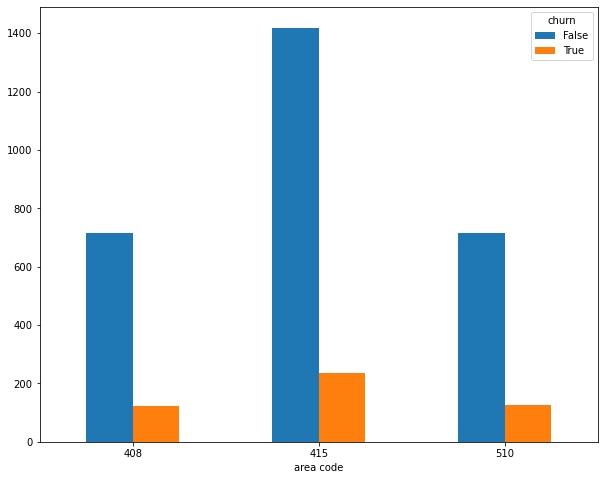

In [18]:
# Plot Customer Churn by Area Code without normalization
df0.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=0)
# almost half of the customers have  area code 415

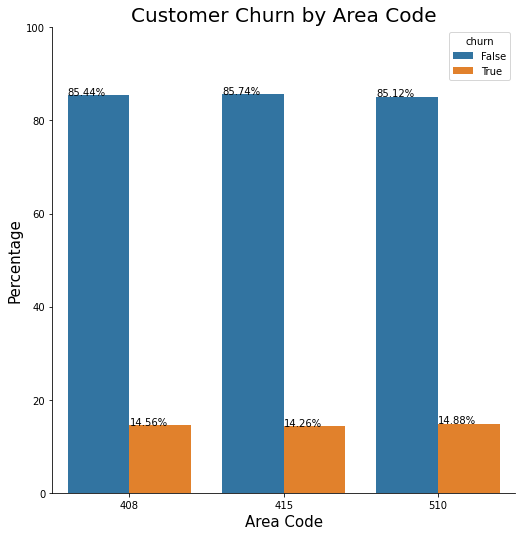

In [19]:
# Plot Customer Churn by Area Code without with normalization
x,y = 'area code', 'churn'

df2 = df0.groupby(x)[y].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df2,legend_out=False,height=7, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('Area Code', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Customer Churn by Area Code', fontsize=20)
plt.show()    
#after normalize the value counts of the area code, it is clear that the churn rate is almost the same in all areas.
# so area code doesn't have any significant effect on the customer churn

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

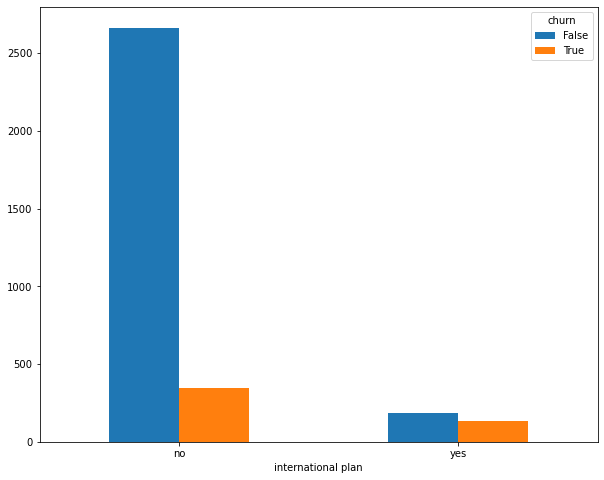

In [20]:
# plot Customer Churn with International Plan without normalization
df0.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=0)
# almost half of the customers have  area code 415

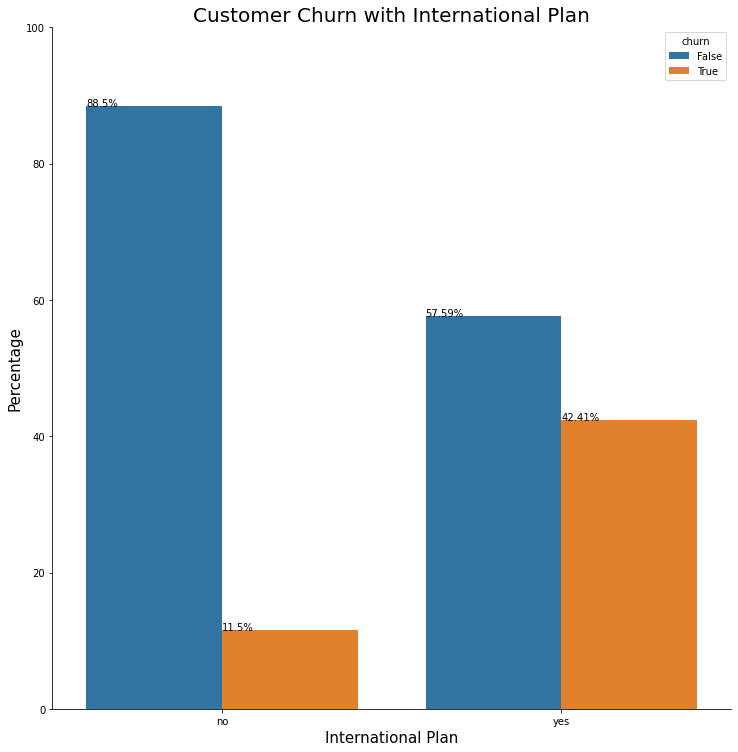

In [98]:
# plot Customer Churn with International Plan with normalization
x,y = 'international plan', 'churn'

df1 = df0.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df1,legend_out=False,height=10, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('International Plan', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Customer Churn with International Plan', fontsize=20)
plt.savefig("images/International_Plan.png")
plt.show()    

#42% of the customers who have an international plan will leave, so Syriatel should work on their international plan
   
# https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

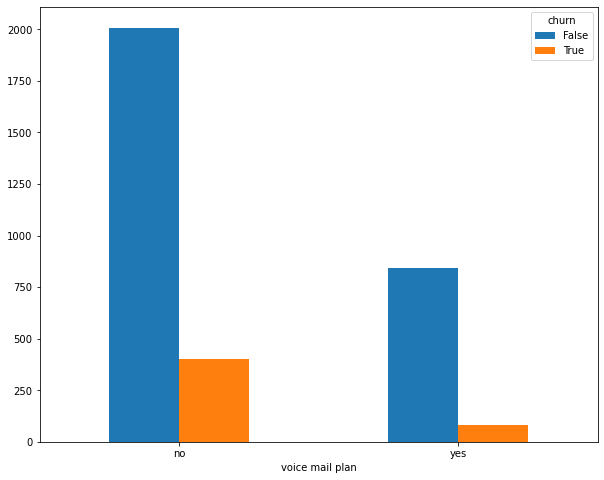

In [22]:
# Plot Customer Churn with Voice Mail Plan without normalization
df0.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=0)


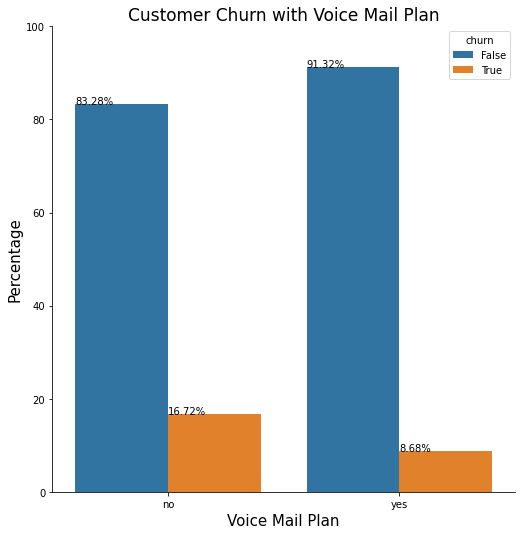

In [23]:
# Plot Customer Churn with Voice Mail Plan with normalization
x,y = 'voice mail plan', 'churn'

df3 = df0.groupby(x)[y].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df3,legend_out=False,height=7, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('Voice Mail Plan', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Customer Churn with Voice Mail Plan', fontsize=17)
plt.show()    
# only 9% of the customers who have voice mail plan will churn
# so Syriatel should offer a free voice plan to all customers 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


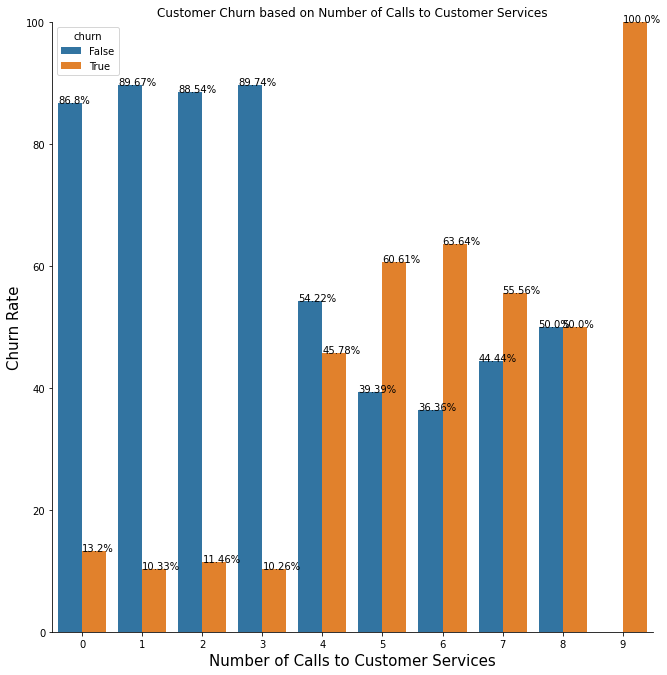

In [24]:
# Plot Customer Churn based on Number of Calls to Customer Services with normalization
x,y = 'customer service calls', 'churn'

df3 = df0.groupby(x)[y].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df3,legend_out=False,height=9, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('Number of Calls to Customer Services', fontsize=15)
plt.ylabel('Churn Rate', fontsize=15)
plt.title('Customer Churn based on Number of Calls to Customer Services', fontsize=12)
plt.savefig("images/Customer_Services_calls.png")
plt.show()    

# customers are more likely to leave if they call customer service more than three times.
# more training to the customer service department is required

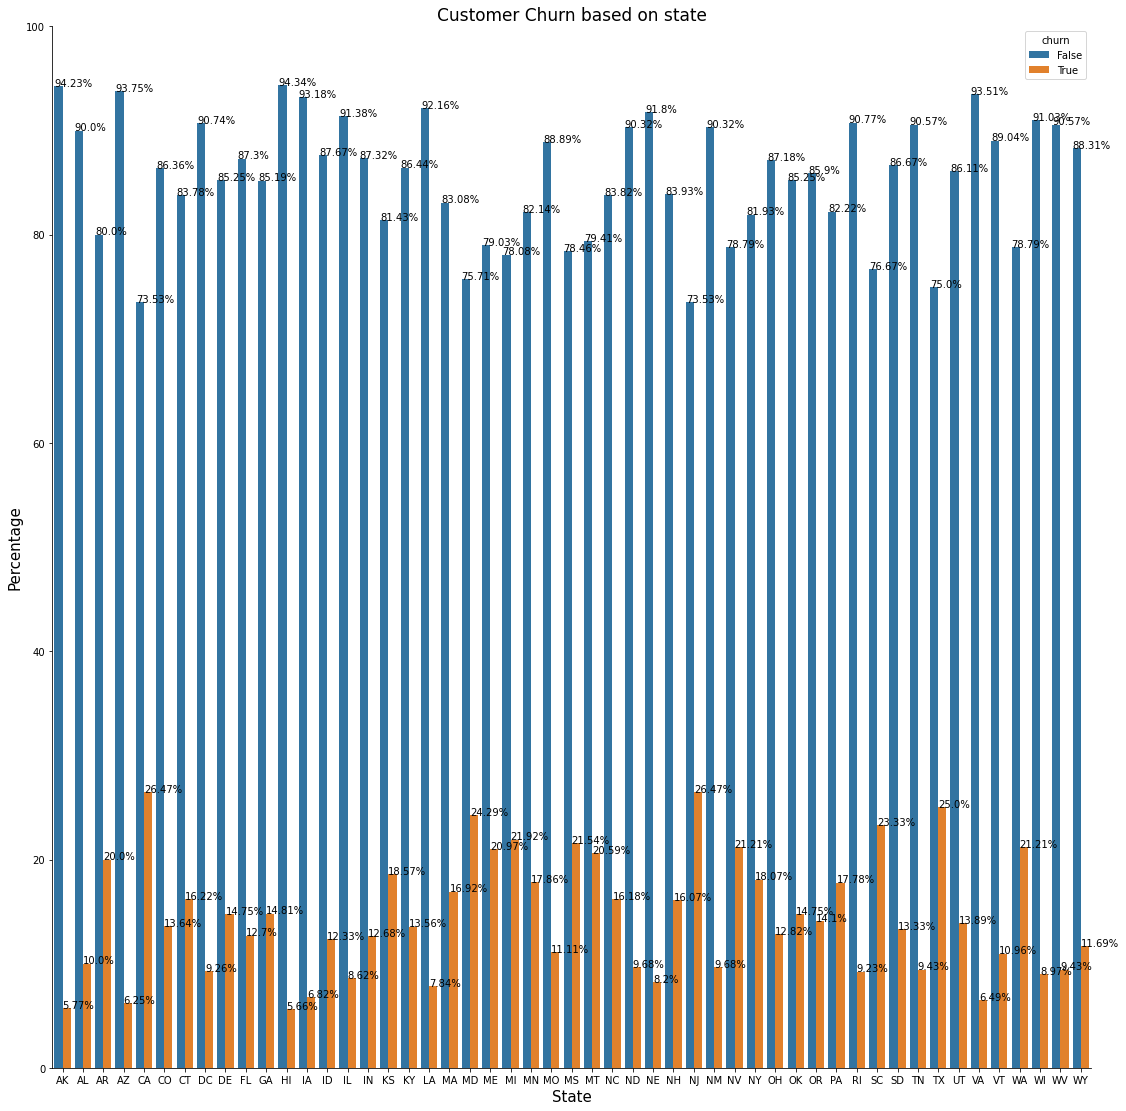

In [25]:
# plot Customer Churn based on state
x,y = 'state', 'churn'

df4 = df0.groupby(x)[y].value_counts(normalize=True)
df4 = df4.mul(100)
df4 = df4.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df4,legend_out=False,height=15, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('State', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Customer Churn based on state', fontsize=17)
plt.show()    
# the top 5 churn's state are California, New Jersey, Texas, Maryland, and South Carolina,
# maybe they have bad coverage or competitive provider at those states 
# so customer service should pay special attention to those states

In [26]:
# drop the unwanted column, area code has no valid information for our model
df0 = df0.drop(["area code"],axis =1) 

### Metric

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  

$$ \text{Recall} = \frac{\text{TP}}{\text{TP+FN}} $$  

The most important metric for customer churn is recall score because I want to lower the False-negative, I don't want to predict that this customer is going to stay while in fact, he/she is leaving. This will cause losing a customer and money because Keeping the current customers is less expensive than bringing new ones.


In [27]:
def evaluate(estimator, X_train, X_test, y_train, y_test, use_decision_function='yes'):
    '''
    Evaluation function to show a few scores for both the train and test set
    Also shows a confusion matrix for the test set
    
    use_decision_function allows you to toggle whether you use decision_function or
    predict_proba in order to get the output needed for roc_auc_score
    If use_decision_function == 'skip', then it ignores calculating the roc_auc_score
    '''
    # grab predictions
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)
    
    # output needed for roc_auc_score
    if use_decision_function == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif use_decision_function == 'yes': # not all classifiers have decision_function
        train_out = estimator.decision_function(X_train)
        test_out = estimator.decision_function(X_test)
    elif use_decision_function == 'no':
        train_out = estimator.predict_proba(X_train)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_test)[:, 1]
    else:
        raise Exception ("The value for use_decision_function should be 'skip', 'yes' or 'no'.")

    print(type(test_out))
    
    # print scores
    print("Train Scores")
    print("------------")
    print(f"Recall: {recall_score(y_train, train_preds)}")
    print(f"Precision: {precision_score(y_train, train_preds)}")
    print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
    print(f"F1 Score: {f1_score(y_train, train_preds)}")
    if type(train_out) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
    print("----" * 5)
    print("Test Scores")
    print("-----------")
    print(f"Recall: {recall_score(y_test, test_preds)}")
    print(f"Precision: {precision_score(y_test, test_preds)}")
    print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
    print(f"F1 Score: {f1_score(y_test, test_preds)}")
    if type(test_out) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")
    
    # plot test confusion matrix
    plot_confusion_matrix(estimator, X_test, y_test)
    plt.show()

In [28]:
# spliting the data to training and testing data (df0)
# and validation data which I will keep aside for model validation later
df, df_val1 = train_test_split(df0, test_size= 0.1, random_state=10)

In [29]:
df_val1.shape

(334, 19)

In [30]:
# creat X and y
y = df["churn"]
X = df.drop(["churn"],axis =1)

In [31]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=33)

In [32]:
# preprocessing the data

# grab numeric columns, object columns with fewer than 10 for OHE
# grab columns with more than 10 value for frequency counter

num_cols = []
ohe_cols = []
freq_cols = []
    
for c in X.columns:
    if df[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif len(X[c].unique()) <= 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [33]:
# Check our work
print(f"Numeric: {num_cols}")
print(f"To OHE: {ohe_cols}")
print(f"To Frequency Encode: {freq_cols}")

Numeric: ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
To OHE: ['international plan', 'voice mail plan']
To Frequency Encode: ['state']


In [34]:
# Now, set up the preprocessing steps for each type of col
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

ohe_transformer = Pipeline(steps=[('ohe', OneHotEncoder())])

freq_transformer = Pipeline(steps=[('freq_enc', ce.CountEncoder(normalize=True,
                                 min_group_size=0.001,
                                 min_group_name='Other'))])

# Put together our preprocessor using a Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat_ohe', ohe_transformer, ohe_cols), 
        ('cat_freq', freq_transformer, freq_cols)])


## Modeling

## Logistic Regression

In [35]:
#  prediction pipeline.
lr_pipe = Pipeline([('preprocessor', preprocessor),
                             ('clf', LogisticRegression(class_weight="balanced"))])


lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

Used Minmax scaler and Standard scaler and got the same result for both scalers: recall 76% on the train and 79% on the test.  For the accuracy score, I got 77 % training and 77 % on test data. the dumb model can predict a better than the logistic regression model 85 % accuracy score, I've changed different hyperparameter, but everything makes it worth

<class 'numpy.ndarray'>
Train Scores
------------
Recall: 0.7552083333333334
Precision: 0.3756476683937824
Accuracy: 0.774029030992546
F1 Score: 0.5017301038062283
ROC-AUC: 0.8256038298691303
--------------------
Test Scores
-----------
Recall: 0.7962962962962963
Precision: 0.3006993006993007
Accuracy: 0.7533333333333333
F1 Score: 0.4365482233502538
ROC-AUC: 0.8128039655817434


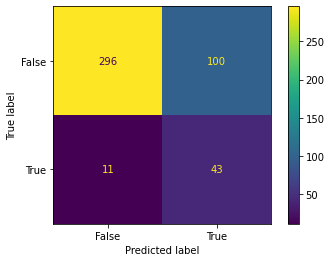

In [36]:
# Evaluate
evaluate(lr_pipe, X_train, X_test, y_train, y_test)

In [37]:
# # Define the grid
# param_grid = {
#     "clf__penalty": ['l1', 'l2','elasticnet', 'none'], 
#     'clf__C':[0.001,.009,0.01,.09,1,5,10,25],
#     "clf__fit_intercept" :[True, False],
#     "clf__solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
   
# }
# gridsearch = GridSearchCV(lr_pipe, 
#                           param_grid=param_grid, 
#                           scoring='recall',
#                           cv=3)
# Fit the training data
#gridsearch.fit(X_train, y_train)

In [38]:
#gridsearch.best_params_
# {'clf__C': 0.001,
#  'clf__fit_intercept': False,
#  'clf__penalty': 'l2',
#  'clf__solver': 'newton-cg'}


In [39]:
# Print the accuracy on test set
# gridsearch.score(X_test, y_test)
# gridseard score 74% which is lower than what i have without grid searh

In [40]:
lr_pipe = Pipeline([('preprocessor', preprocessor),
                             ('clf', LogisticRegression(class_weight="balanced",C= 0.001, fit_intercept=False,
                                                        solver="newton-cg"))])

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'numpy.ndarray'>
Train Scores
------------
Recall: 0.7682291666666666
Precision: 0.3004073319755601
Accuracy: 0.695566888976069
F1 Score: 0.43191800878477304
ROC-AUC: 0.7915969014626635
--------------------
Test Scores
-----------
Recall: 0.7962962962962963
Precision: 0.24293785310734464
Accuracy: 0.6777777777777778
F1 Score: 0.3722943722943723
ROC-AUC: 0.7846520763187431


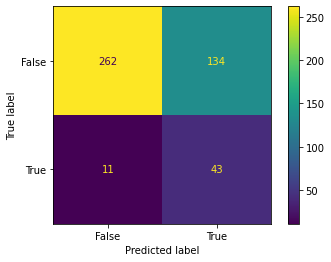

In [41]:
# Evaluate
evaluate(lr_pipe, X_train, X_test, y_train, y_test)

## KNN

In [42]:
#  prediction pipeline.
knn_pipe = Pipeline([('preprocessor', preprocessor),
                             ('knn', KNeighborsClassifier())])

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'bool'>
Train Scores
------------
Recall: 0.4088541666666667
Precision: 0.9573170731707317
Accuracy: 0.9081992938407218
F1 Score: 0.572992700729927
--------------------
Test Scores
-----------
Recall: 0.37037037037037035
Precision: 0.8333333333333334
Accuracy: 0.9155555555555556
F1 Score: 0.5128205128205128


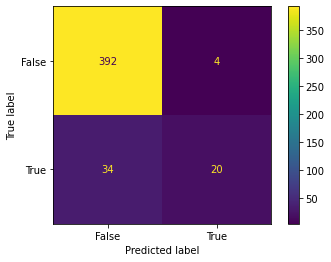

In [43]:
# Evaluate
evaluate(knn_pipe, X_train, X_test, y_train, y_test,use_decision_function='skip')

In [44]:
# param_grid = {
#     "knn__n_neighbors" : [1,3,5,7,9,11,13,15,17,19,21], 
#     "knn__weights" : ['uniform', 'distance'],
#     "knn__p" : [1,2,3,4,5,6,7,8,9]
# }
# knn_grid = GridSearchCV(knn_pipe, 
#                           param_grid=param_grid, 
#                           scoring='recall',
#                           cv=3)
#knn_grid.fit(X_train, y_train)

In [45]:
# knn_grid.best_params_
# #{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}

In [46]:
knn_pipe = Pipeline([('preprocessor', preprocessor),
                             ('knn', KNeighborsClassifier(n_neighbors= 1,p=1))])

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'bool'>
Train Scores
------------
Recall: 1.0
Precision: 1.0
Accuracy: 1.0
F1 Score: 1.0
--------------------
Test Scores
-----------
Recall: 0.4444444444444444
Precision: 0.5454545454545454
Accuracy: 0.8888888888888888
F1 Score: 0.4897959183673469


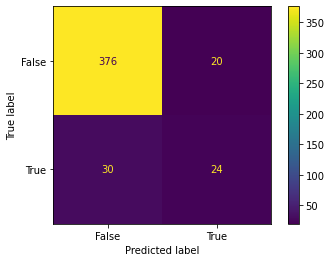

In [47]:
# Evaluate
evaluate(knn_pipe, X_train, X_test, y_train, y_test,use_decision_function='skip')

## DecisionTree

In [48]:
dt_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('dt', DecisionTreeClassifier(class_weight='balanced'))])
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'bool'>
Train Scores
------------
Recall: 1.0
Precision: 1.0
Accuracy: 1.0
F1 Score: 1.0
--------------------
Test Scores
-----------
Recall: 0.6296296296296297
Precision: 0.6538461538461539
Accuracy: 0.9155555555555556
F1 Score: 0.6415094339622641


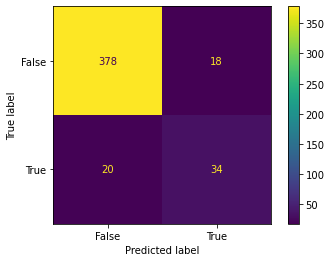

In [49]:
# Evaluate
evaluate(dt_pipe, X_train, X_test, y_train, y_test,use_decision_function='skip')

# the training data is overfit

## Random Forest

In [50]:
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('rf', RandomForestClassifier(random_state=0))])
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'bool'>
Train Scores
------------
Recall: 1.0
Precision: 1.0
Accuracy: 1.0
F1 Score: 1.0
--------------------
Test Scores
-----------
Recall: 0.6851851851851852
Precision: 0.9024390243902439
Accuracy: 0.9533333333333334
F1 Score: 0.7789473684210526


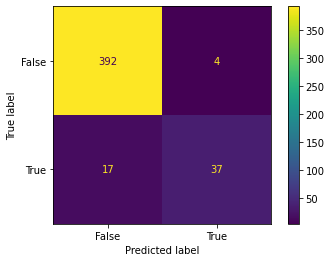

In [51]:
# Evaluate
evaluate(rf_pipe, X_train, X_test, y_train, y_test,use_decision_function='skip')

# the data is overfit but better than decsion tree

In [52]:
# param_grid = {
#     "rf__n_estimators" : [20,40,60,80,100,200,300,400,500,600,700],
#     'rf__criterion': ['gini', 'entropy'],
#     'rf__max_depth': [None, 2, 3, 4, 5, 6],
#     'rf__min_samples_split': [2, 5,6,10,14],
#     'rf__min_samples_leaf': [1, 2, 3, 4, 5, 6],
#     'rf__max_leaf_nodes': [40,80,100]
# }
# rf_grid = GridSearchCV(rf_pipe, 
#                           param_grid=param_grid, 
#                           scoring='recall',
#                           cv=3,verbose= 2, n_jobs= -1)
# rf_grid.fit(X_train, y_train)

In [53]:
#optimal_rf=rf_grid.best_params_
# {'rf__criterion': 'gini',
#  'rf__max_depth': None,
#  'rf__max_leaf_nodes': 80,
#  'rf__min_samples_leaf': 1,
#  'rf__min_samples_split': 6,
#  'rf__n_estimators': 80}

In [54]:
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('rf', RandomForestClassifier(n_estimators= 80,random_state=42,min_samples_split=6,
                                            max_leaf_nodes=80))])
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'bool'>
Train Scores
------------
Recall: 0.8567708333333334
Precision: 1.0
Accuracy: 0.9784229109454688
F1 Score: 0.9228611500701261
--------------------
Test Scores
-----------
Recall: 0.6666666666666666
Precision: 0.9230769230769231
Accuracy: 0.9533333333333334
F1 Score: 0.7741935483870968


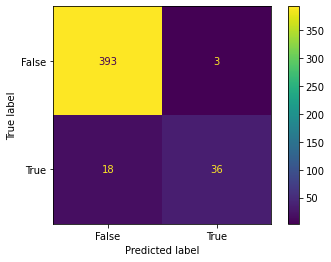

In [55]:
# Evaluate
evaluate(rf_pipe, X_train, X_test, y_train, y_test,use_decision_function='skip')


## Ada Boost

In [56]:
ab_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('ab', AdaBoostClassifier(random_state=0))])
ab_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'numpy.ndarray'>
Train Scores
------------
Recall: 0.4869791666666667
Precision: 0.7695473251028807
Accuracy: 0.9007453903491566
F1 Score: 0.5964912280701755
ROC-AUC: 0.9219339395688991
--------------------
Test Scores
-----------
Recall: 0.3333333333333333
Precision: 0.5625
Accuracy: 0.8888888888888888
F1 Score: 0.4186046511627907
ROC-AUC: 0.7866161616161615


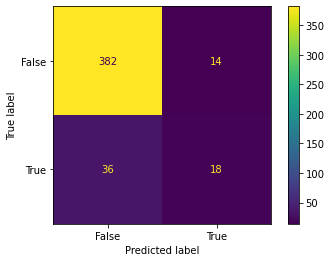

In [57]:
# Evaluate
evaluate(ab_pipe, X_train, X_test, y_train, y_test)


## Gradient Boosting

In [58]:
gb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('gb',GradientBoostingClassifier(random_state=0))])
gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'numpy.ndarray'>
Train Scores
------------
Recall: 0.8203125
Precision: 0.9905660377358491
Accuracy: 0.9717536288740682
F1 Score: 0.8974358974358975
ROC-AUC: 0.9718509430331024
--------------------
Test Scores
-----------
Recall: 0.6851851851851852
Precision: 0.8809523809523809
Accuracy: 0.9511111111111111
F1 Score: 0.7708333333333335
ROC-AUC: 0.8692480359147026


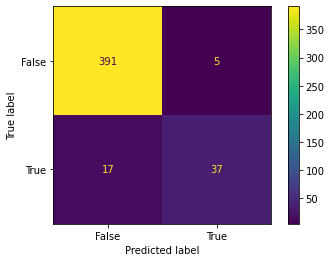

In [59]:
# Evaluate
evaluate(gb_pipe, X_train, X_test, y_train, y_test)

## XGBoost

In [60]:
xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('xgb',XGBClassifier(random_state=0))])
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'bool'>
Train Scores
------------
Recall: 0.7916666666666666
Precision: 0.9806451612903225
Accuracy: 0.9662612789329149
F1 Score: 0.8760806916426512
--------------------
Test Scores
-----------
Recall: 0.6851851851851852
Precision: 0.8604651162790697
Accuracy: 0.9488888888888889
F1 Score: 0.7628865979381443


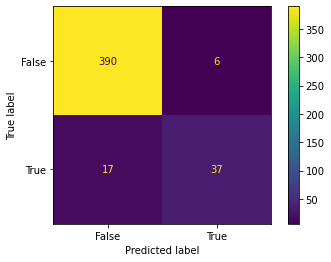

In [61]:
# Evaluate
evaluate(xgb_pipe, X_train, X_test, y_train, y_test,use_decision_function='skip')


In [62]:
# param_grid = {
#     'xgb__learning_rate': [0.001,0.002,0.009,0.1, 0.2,0.03,0.04],
#     'xgb__max_depth': [4,5,6],
#     'xgb__min_child_weight': [1, 2,3,4],
#     'xgb__n_estimators': [100,200,300,400,800,900],
# }
# xgb_grid = GridSearchCV(xgb_pipe, 
#                           param_grid=param_grid, 
#                           scoring='recall',
#                           cv=3,verbose= 2, n_jobs= -1)
# xgb_grid.fit(X_train, y_train)

In [63]:
# xgb_grid.best_params_
# {'xgb__learning_rate': 0.03,
#  'xgb__max_depth': 5,
#  'xgb__min_child_weight': 2,
#  'xgb__n_estimators': 400}

In [64]:
# xgb_grid.best_params_
# {'xgb__learning_rate': 0.1,
#  'xgb__max_depth': 6,
#  'xgb__min_child_weight': 1,
#  'xgb__n_estimators': 100,
#  'xgb__subsample': 0.7}

In [65]:
# xgb_grid.best_params_
# {'xgb__learning_rate': 0.009,
#  'xgb__max_depth': 6,
#  'xgb__min_child_weight': 1,
#  'xgb__n_estimators': 400,
#  'xgb__subsample': 0.7}

In [66]:
xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('xgb',XGBClassifier(random_state=0,max_depth=6,learning_rate=0.009,subsample=0.8,
                                               min_child_weight=2,n_estimators=1000))])
xgb_pipe.fit(X_train, y_train)

# delete the learning rate and subsample make the recall score better1 training, and 79 test
#86 train 72 test

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                            

<class 'bool'>
Train Scores
------------
Recall: 0.8697916666666666
Precision: 1.0
Accuracy: 0.9803844644958808
F1 Score: 0.9303621169916435
--------------------
Test Scores
-----------
Recall: 0.7222222222222222
Precision: 0.8863636363636364
Accuracy: 0.9555555555555556
F1 Score: 0.7959183673469388


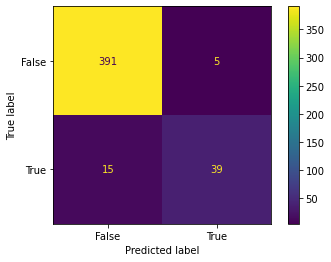

In [67]:
# Evaluate
evaluate(xgb_pipe, X_train, X_test, y_train, y_test,use_decision_function='skip')
# after trying different hyperparameters, the model didn't get the test score that I want yet with the pipeline
# I will try one final model without the pipeline

In [68]:
# I will test the model on the 10% of the validation data left aside from the beginning before  train test
df_val1.head()
df_val1.shape

(334, 19)

In [69]:
y_val = df_val1["churn"]
X_val = df_val1.drop(["churn"],axis =1)

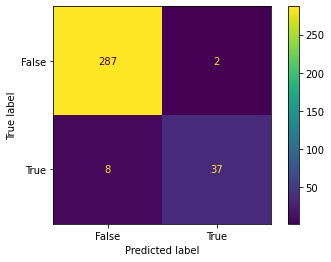

In [70]:
plot_confusion_matrix(xgb_pipe,X_val,y_val )

In [71]:
recall_score(y_val ,xgb_pipe.predict(X_val),labels = ["False","True"],pos_label= True) 
# I got a better recall score on the validation data

0.8222222222222222

## Final model

In [72]:
df01 = df00.copy()

In [73]:
df01, df_val = train_test_split(df01, test_size= 0.25,random_state=4)

In [74]:
# one hot encode international plan and voice mail
df01["international plan"] = pd.get_dummies(df01["international plan"], columns="international plan", drop_first=False)
df01["voice mail plan"] = pd.get_dummies(df01["voice mail plan"], columns="voice mail plan", drop_first=False)

In [75]:
df01["churn"]= df01["churn"].apply(lambda x: 1 if x == True else 0)
# turning the Boolean value to integers (1,2)

In [76]:
df01.head().T

,2497,1222,161,2204,216
state,MN,MT,VA,MS,FL
account length,79,113,141,43,93
area code,408,415,415,510,415
phone number,383-4319,419-5505,417-4885,358-3691,328-6770
international plan,1,1,1,1,1
voice mail plan,0,1,1,1,1
number vmail messages,32,0,0,0,0
total day minutes,50.6,215.9,217.1,159.5,151.4
total day calls,62,93,110,99,89
total day charge,8.6,36.7,36.91,27.12,25.74


In [77]:
# dropping unwanted columns
df01 = df01.drop(["phone number","state","area code"],axis =1) 

In [78]:
# creat X and y
y1 = df01["churn"]
X1 = df01.drop(["churn"],axis =1)

In [79]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=1)

In [80]:
df01.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
2497,79,1,0,32,50.6,62,8.60,201.4,87,17.12,146.8,121,6.61,4.2,4,1.13,2,0
1222,113,1,1,0,215.9,93,36.70,240.1,85,20.41,156.7,123,7.05,4.9,5,1.32,3,0
161,141,1,1,0,217.1,110,36.91,241.5,111,20.53,253.5,103,11.41,12.0,6,3.24,0,0
2204,43,1,1,0,159.5,99,27.12,119.7,149,10.17,173.9,126,7.83,6.8,3,1.84,2,0
216,93,1,1,0,151.4,89,25.74,186.4,76,15.84,172.5,120,7.76,10.9,3,2.94,0,0


In [81]:
# # Fit SMOTE to training data
X_trains, y_trains = SMOTE().fit_resample(X_train, y_train)
# fit SMOTE here  to balance the target
# XGBoost not sensitive to standardization because it uses an ensemble algorithm comprised of decision trees 

In [82]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_trains, y_trains)

# Predict on training and test sets
training_preds = clf.predict(X_trains)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_trains, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

<class 'bool'>
Train Scores
------------
Recall: 1.0
Precision: 1.0
Accuracy: 1.0
F1 Score: 1.0
--------------------
Test Scores
-----------
Recall: 1.0
Precision: 1.0
Accuracy: 1.0
F1 Score: 1.0


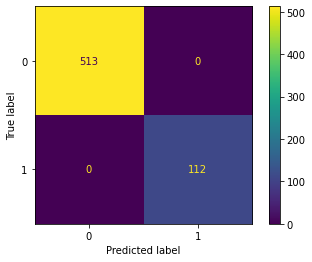

In [83]:
# Evaluate
evaluate(clf, X_trains, X_test, training_preds,test_preds,use_decision_function='skip')
#There is a significant improvement in XGBoost Classifier after using SMOTE. The confusing matrix looks great
#with zero False Negative and False Positive. The testing score is perfect on all metrics. There is a clear 
#improvement from the previous XGBoost model.

**Feature Importance built-in the Xgboost algorithm** 

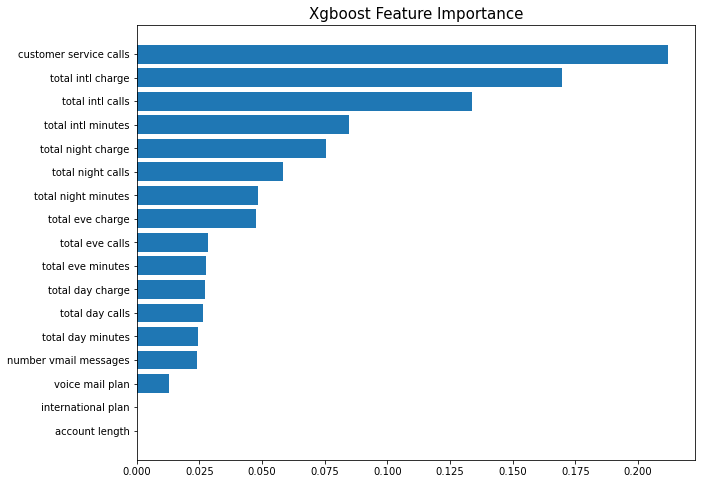

In [84]:
# Plot feature importances
clf.feature_importances_
feat_names= X1.columns
sorted_idx = clf.feature_importances_.argsort()
plt.figure(figsize=(10, 8))
plt.barh(feat_names, clf.feature_importances_[sorted_idx])
plt.title("Xgboost Feature Importance", size = 15)
plt.show()
# The most important features are customer service calls, total charges, calls, and minutes for international calls

**Feature Importance computed with SHAP values**

In [85]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

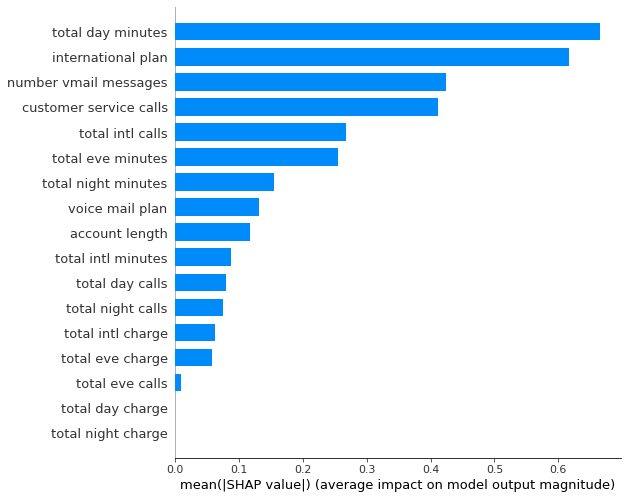

In [86]:
#Plot feature importance by using .summary_plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar",title="Xgboost Feature Importance with SHAP")

# The most important features are international plan, total day minutes, and customer service calls.
# https://mljar.com/blog/feature-importance-xgboost/ 

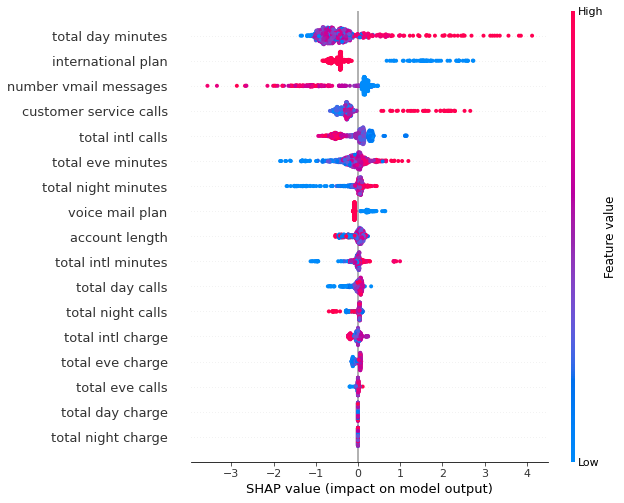

In [87]:
# more interpretation plots from SHAP package
shap.summary_plot(shap_values, X_test)

**Permutation Based Feature Importance**

In [88]:
perm_importance = permutation_importance(clf, X_test, y_test)

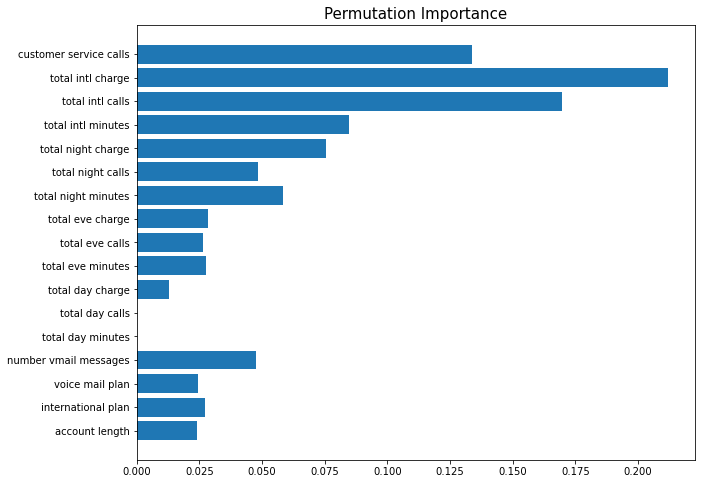

In [89]:
#Plot Permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.barh(feat_names, clf.feature_importances_[sorted_idx])
plt.title("Permutation Importance",size=15)
plt.show()
# The most important features are account length,total charge and calls for international calls, total night calls,
#and customer service calls.

In [90]:
# dropping unwanted columns
df_val = df_val.drop(["phone number","state","area code"],axis =1) 

In [91]:
# one hot encode international plan and voice mail
df_val["international plan"] = pd.get_dummies(df_val["international plan"],columns="international plan", drop_first=False,dtype=float)
df_val["voice mail plan"] = pd.get_dummies(df_val["voice mail plan"], columns="voice mail plan", drop_first=False,dtype=float)

In [92]:
df_val["churn"]= df_val["churn"].apply(lambda x: 1 if x == True else 0)
# turning the Boolean value to integers (1,2)

In [93]:
y_val = df_val["churn"]
X_val = df_val.drop(["churn"],axis =1)

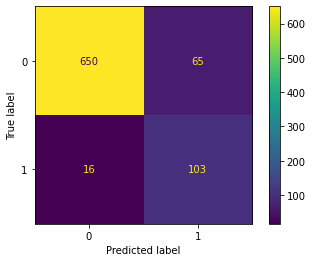

In [94]:
plot_confusion_matrix(clf,X_val,y_val)

In [95]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 2540 to 2398
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          834 non-null    int64  
 1   international plan      834 non-null    float64
 2   voice mail plan         834 non-null    float64
 3   number vmail messages   834 non-null    int64  
 4   total day minutes       834 non-null    float64
 5   total day calls         834 non-null    int64  
 6   total day charge        834 non-null    float64
 7   total eve minutes       834 non-null    float64
 8   total eve calls         834 non-null    int64  
 9   total eve charge        834 non-null    float64
 10  total night minutes     834 non-null    float64
 11  total night calls       834 non-null    int64  
 12  total night charge      834 non-null    float64
 13  total intl minutes      834 non-null    float64
 14  total intl calls        834 non-null  

In [96]:
print(classification_report(y_val, clf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       715
           1       0.61      0.87      0.72       119

    accuracy                           0.90       834
   macro avg       0.79      0.89      0.83       834
weighted avg       0.92      0.90      0.91       834



In [97]:
recall_score(y_val ,clf.predict(X_val),labels = ["False","True"],pos_label= True) 

0.865546218487395

### Conclusions
- There is a significant improvement in XGBoost Classifier after using SMOTE. The confusing matrix looks great with zero False Negative and False Positive.  The testing score is perfect on all metrics. There is a clear improvement from the previous XGBoost model.
- Customers who called customer service more than 3 times tend to leave.
- Customer who has international plan churn at a higher rate than the customer who has not.
- The top 5 churn's state are California, New Jersey, Texas, Maryland, and South Carolina,maybe they have bad coverage or competitive provider at those states; so customer service should pay special attention to those states

### Recommendations:
After looking at various feature importance from my final model, I would recommend the following measures to improve customer retention.
- Improve the quality of the customer service by offering more training.
- Customer service should follow-up with the customers who call 3 times and offer promotions or discounts like a free month.
- Syriatel should revisit its international plan and adjust the pricing.
- Syriatel should offer free voice mail plan for everyone.


### Limitaion

The size of the dataset and the limited features

### Future work
Looking for additional features like the coverage in some states and customer service rating.